Normalized APF Spectra Tutorial

By Malik Bossett

About this Tutorial

This tutorial is intended to show the progression towards creating reduced and normalized spectra. This tutorial will cover:
        - Creating a reduced spectrum
        - Identifying and plotting the H-alpha absorption feature from the reduced and full spectrum
        - Identifying and plotting the Sodium-D absorption feature from full and reduced spectra
        - Normalizing the raw spectra 

Important: This tutorial was created using some elements from Zoe Ko's tutorial on APF Data and Haynes Stephens's tutorial on Breakthrough Listen APF Data.
https://github.com/howardisaacson/APF-BL-DAP/blob/main/APF%20Tutorial/APFtutorial.ipynb
https://github.com/UCBerkeleySETI/breakthrough/blob/master/APF/Tutorial/.ipynb_checkpoints/

In [1]:
%matplotlib inline

In [2]:
from astropy.io import fits
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import os

In [3]:
cd/datag/blpd0/datax/apf

/datag/blpd0/datax/apf


In [4]:
apf_file = fits.open('ucb-aso211.fits')

In [5]:
header = apf_file[0].header
print(repr(header))

SIMPLE  =                    T / NORMAL FITS IMAGE                              
BITPIX  =                   16 / DATA PRECISION                                 
NAXIS   =                    2 / NUMBER OF IMAGE DIMENSIONS                     
NAXIS1  =                 2080 / NUMBER OF COLUMNS                              
NAXIS2  =                 4608 / NUMBER OF ROWS                                 
CRVAL1U =                    0 / COLUMN ORIGIN                                  
CRVAL2U =                    0 / ROW ORIGIN                                     
CDELT1U =                    1 / COLUMN CHANGE PER PIXEL                        
CDELT2U =                    1 / ROW CHANGE PER PIXEL                           
OBSNUM  =                  211 / OBSERVATION NUMBER                             
IDNUM   =                    2 / IMAGE ID                                       
UGEOM   =                    1 / UCAM READOUT GEOMETRY                          
DGEOM   =                   

In [6]:
print("Right Ascension: " + header['RA'])
print("Declination: " + header['DEC'])
print("Target Object: " + header['TOBJECT'])

Right Ascension:  0:39:19.8
Declination:  30:51:38.0
Target Object: HIP3092


In [7]:
image = apf_file[0].data

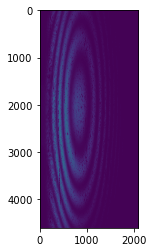

In [8]:
plt.imshow(image)

2080


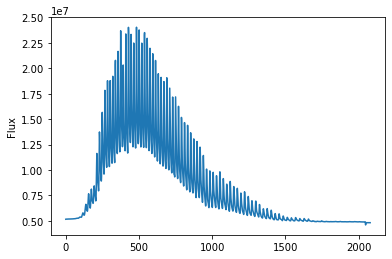

In [9]:
flux = np.sum(image, axis = 0)
plt.ylabel('Flux')
plt.plot(flux)

print(len(flux))

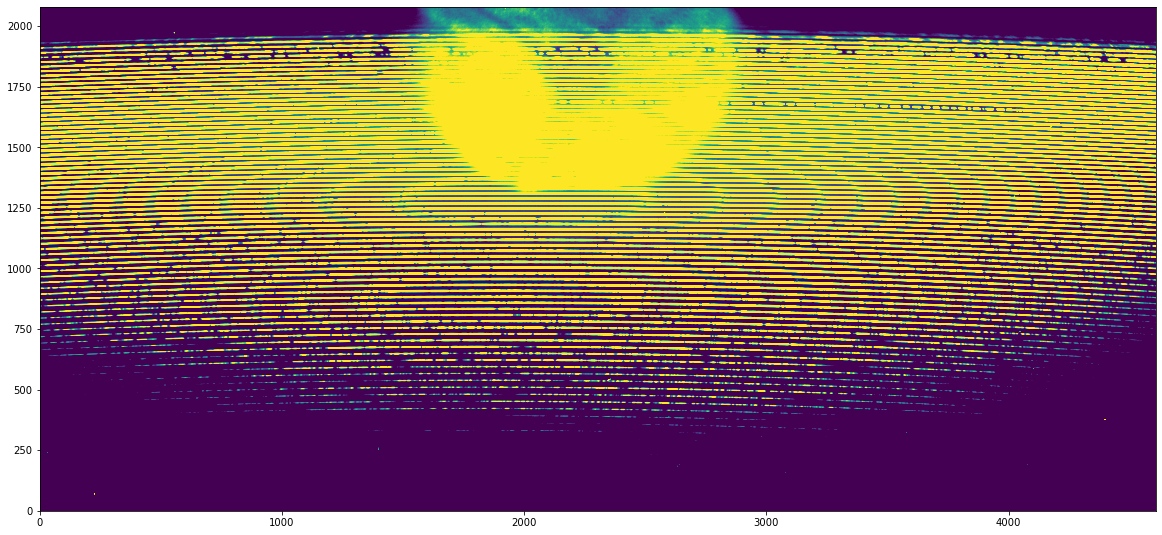

In [10]:
image_rot = np.rot90(image)
plt.figure(figsize=(20,20))
plt.imshow(image_rot, vmin = np.median(image_rot), vmax = np.median(image_rot) * 1.2, origin = 'lower')

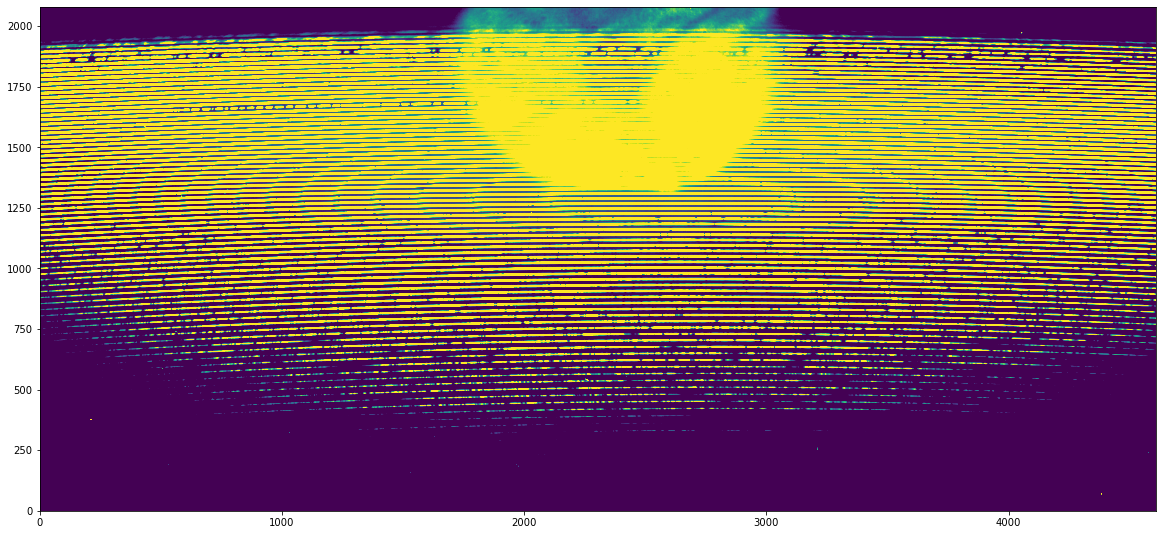

In [11]:
image_flip = np.fliplr(image_rot)
plt.figure(figsize=(20,20))
plt.imshow(image_flip, vmin = np.median(image_flip), vmax = np.median(image_flip) * 1.2, origin = 'lower')

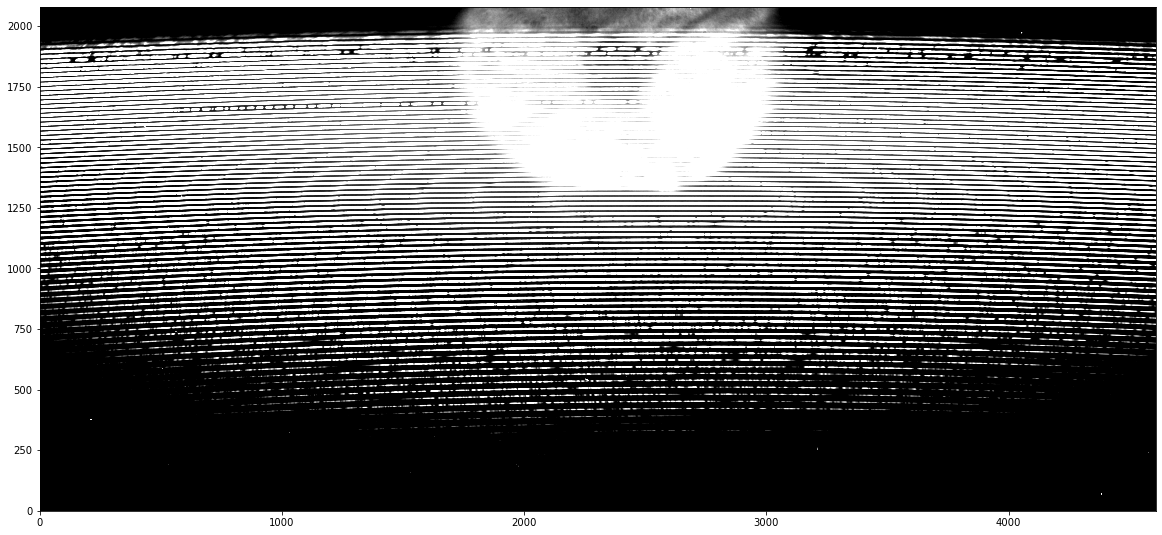

In [12]:
plt.figure(figsize=(20,20))
plt.imshow(image_flip, cmap = 'gray', 
           vmin = np.median(image_flip), vmax = np.median(image_flip) * 1.2, origin = 'lower')

Text(0.5, 1.0, 'small patch [1683:1688, 2200:2800] of telluric lines')

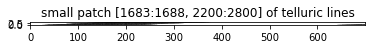

In [13]:
patch = image_flip[1683:1688, 500:1200]
# ^ Cutout of our 2D array, like a patch out of a quilt
plt.imshow(patch, cmap = 'gray', 
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [1683:1688, 2200:2800] of telluric lines')

Text(0.5, 1.0, 'small patch [1683:1688, 500:2000] of telluric lines')

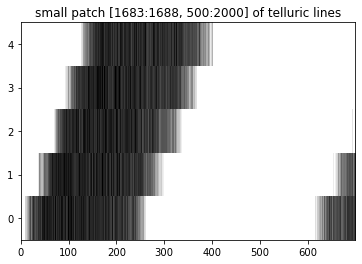

In [14]:
plt.imshow(image_flip[1683:1688, 500:1200], cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [1683:1688, 500:2000] of telluric lines')

In [15]:
patch = image_flip[1690:1700, 500:1200]
patch.size

7000

In [16]:
telluric_1D = np.sum(patch, axis = 0)

Text(0, 0.5, 'Pixel')

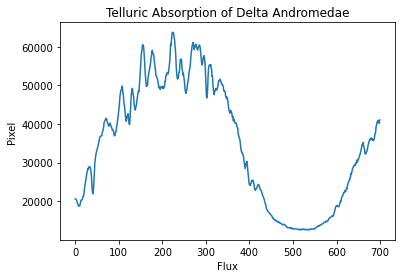

In [17]:
plt.plot(telluric_1D)
plt.title('Telluric Absorption of Delta Andromedae')
plt.xlabel('Flux')
plt.ylabel('Pixel')

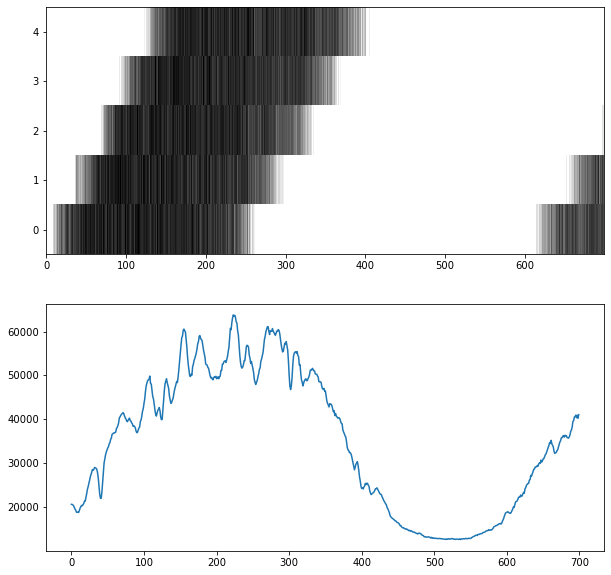

In [18]:
plt.figure(figsize =(10,10))
plt.subplot(2,1,1)
plt.imshow(image_flip[1683:1688,500:1200], cmap = 'gray', aspect = 'auto', 
           interpolation = 'nearest', origin = 'lower',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2)
plt.subplot(2,1,2)
plt.plot(telluric_1D)

In [19]:
bias = np.median(image_flip[-30:])
print (bias)

1085.0


Text(0, 0.5, 'Pixel')

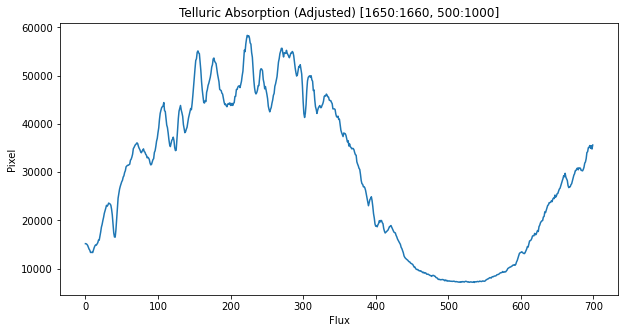

In [20]:
plt.figure(figsize=(10,5))
telluric_1D_adj = telluric_1D - (5*bias)
plt.plot(telluric_1D_adj)
plt.title('Telluric Absorption (Adjusted) [1650:1660, 500:1000]')
plt.xlabel('Flux')
plt.ylabel('Pixel')

In [21]:
os.chdir('/datag/blpd0/datax/apf')
apfdir = '/mnt_home/malikb'

In [27]:
star = 'HIP3092(Delta Andromedae)'
Wave_Path = '/mnt_home/malikb/apf_wav.fits'
Flux_Path = '/datag/blpd0/datax/apf/raso.211.fits'

Wave_file = fits.open(Wave_Path)
Flux_file = fits.open(Flux_Path)
Wave_image = Wave_file[0].data
Wave_image = Flux_file[0].data

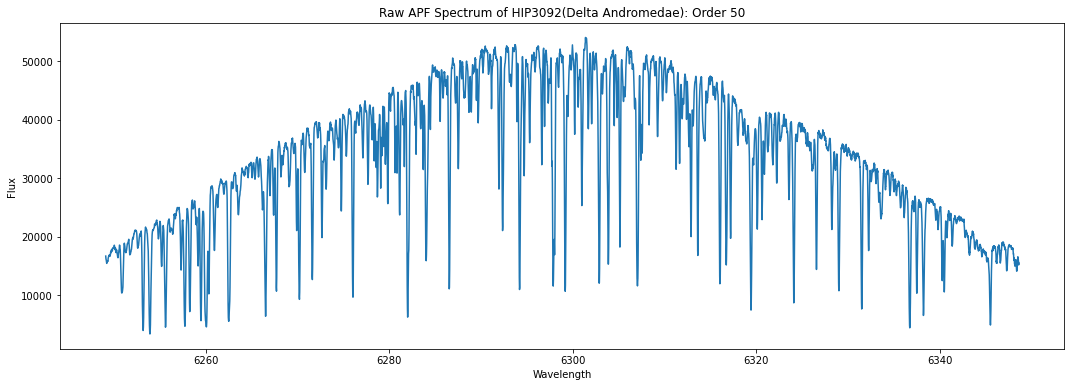

In [33]:
plt.rcParams["figure.figsize"] = (18,6)

order = 50
wave = wl_image[order]
flux = fl_image[order][:-1]
plt.plot(wave,flux)

plt.title('Raw APF Spectrum of ' + star + ': Order ' + str(order))
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.show()

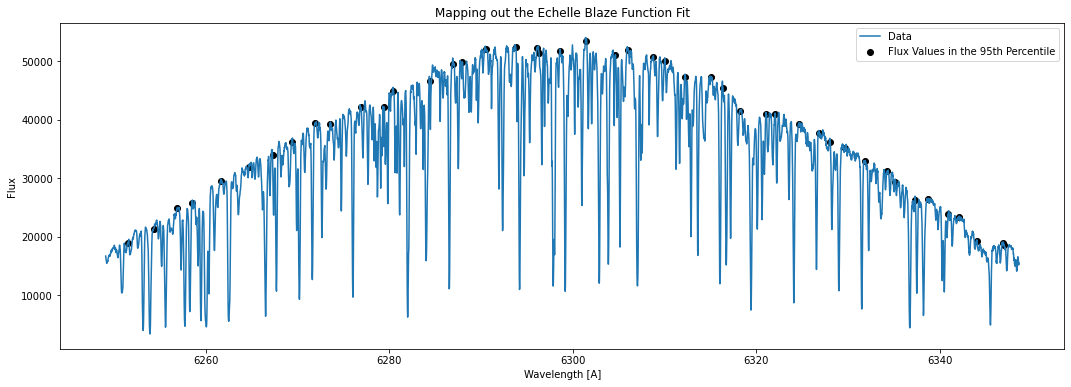

In [35]:

bin = 100

# this list will contain the indices corresponding to each of the 95th percentile flux values in each bin
indices = []

for i in np.arange((len(wave) - (bin)), step = bin):
    flux_values = []
    for j in np.arange(i, i + bin, step = 1):
        value = flux[j]
        flux_values = np.append(flux_values, value)
    # find the 95th percentile flux value: we use 95 to get the maximum flux value in general 
    # but avoid issues with cosmic rays and other emission lines
    flux_in_bin = np.percentile(flux_values, 95)
    # find the closest value in the flux array to the 95th percentile value
    absolute_difference_function = lambda list_value : abs(list_value - flux_in_bin)
    flux_in_bin = min(flux_values.tolist(), key=absolute_difference_function)
    index_in_bin = flux_values.tolist().index(flux_in_bin)
    index = i + index_in_bin
    indices = np.append(indices, index)

# these lists will contain the wavlength and flux values at each index in 'indices'
wave_values = []
flux_values = []

for index in indices:
    ind = int(index)
    wave_values = np.append(wave_values, wave[ind])
    flux_values = np.append(flux_values, flux[ind])
    
plt.plot(wave, flux, label = 'Data')
plt.scatter(wave_values, flux_values, color = 'black', label = 'Flux Values in the 95th Percentile')
plt.title('Mapping out the Echelle Blaze Function Fit')
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.legend()
plt.show()

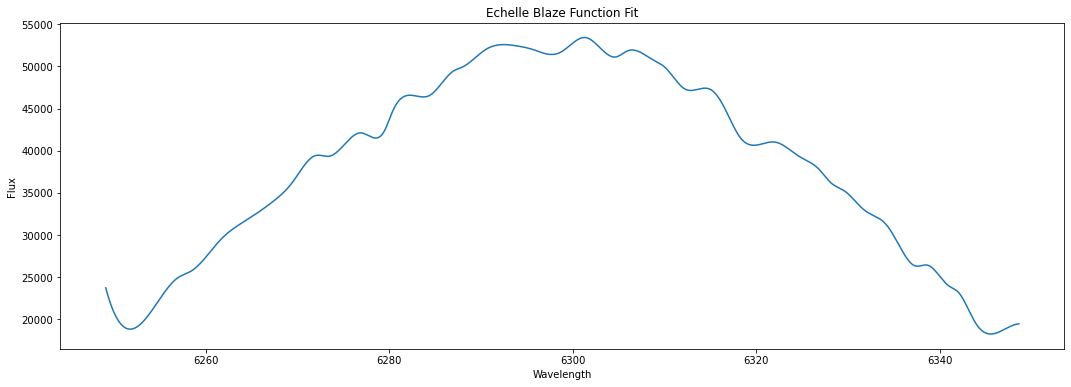

In [43]:
import scipy.interpolate
from scipy.interpolate import splev, splrep
spl = splrep(wave_values, flux_values, s = 500000)
flux_fit = splev(wave, spl)
plt.plot(wave, flux_fit)
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.title('Echelle Blaze Function Fit')
plt.show()

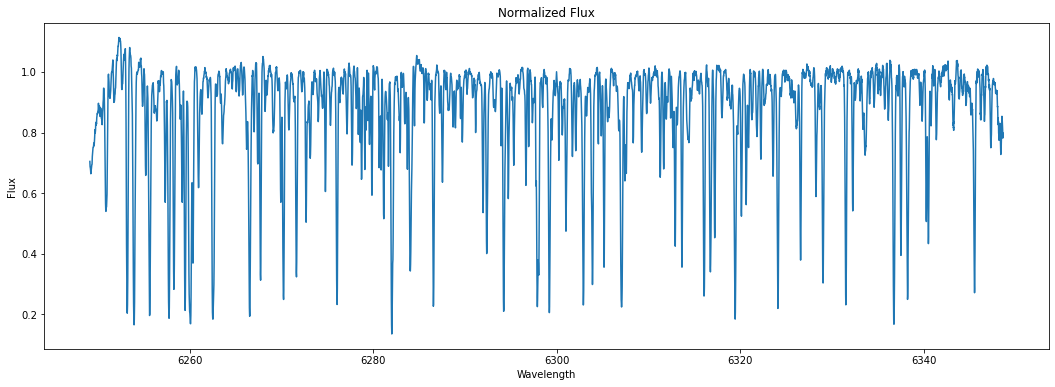

In [38]:
first_normalized_flux = flux / flux_fit
plt.plot(wave, first_normalized_flux)
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.title('Normalized Flux')
plt.show()

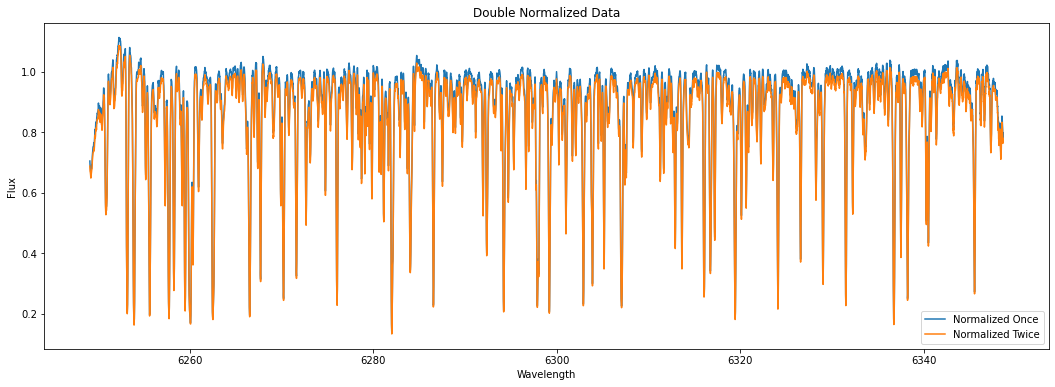

In [44]:
flux98 = np.percentile(first_normalized_flux, 98)
normalized_flux = first_normalized_flux / flux98

plt.plot(wave, first_normalized_flux, label = 'Normalized Once')
plt.plot(wave, normalized_flux, label = 'Normalized Twice')
plt.legend()
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.title('Double Normalized Data')
plt.show()

In [45]:
def cut_n_zoom(x1,x2,y1,y2):
    plt.figure(figsize=(10,10))
    plt.imshow(image_flip[x1:x2, y1:y2], cmap = 'gray', aspect = 'auto', 
               vmin = np.median(image), vmax = np.median(image) *1.2, origin = 'lower')
    plt.show()

In [46]:
#cutting out the patch with the absorption feature
h_alpha_patch = image_flip[1491:1506,1500:2500] 
#take the sum along the columns, and subtract 15 biases
h_alpha_patch_1D_without_bias = np.sum(h_alpha_patch, axis = 0) - bias*15

Text(0.5, 1.0, 'H-alpha')

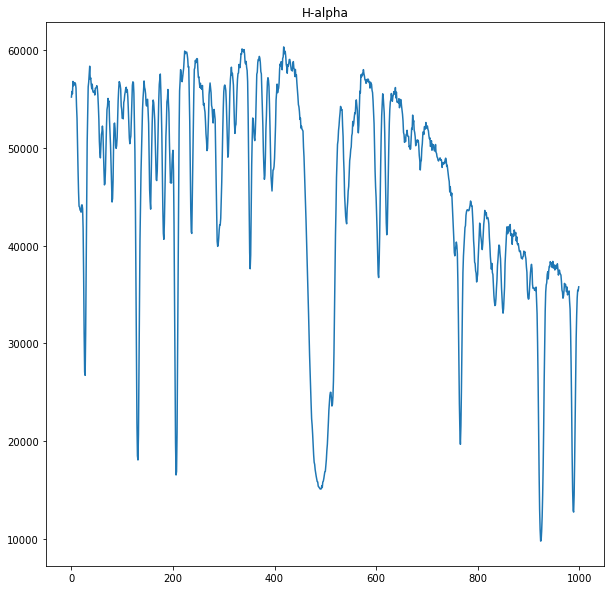

In [47]:
# Plotting H-alpha absorption line
plt.figure(figsize=(10,10))
plt.plot(np.sum(h_alpha_patch, axis = 0) - bias*15)
plt.title('H-alpha')

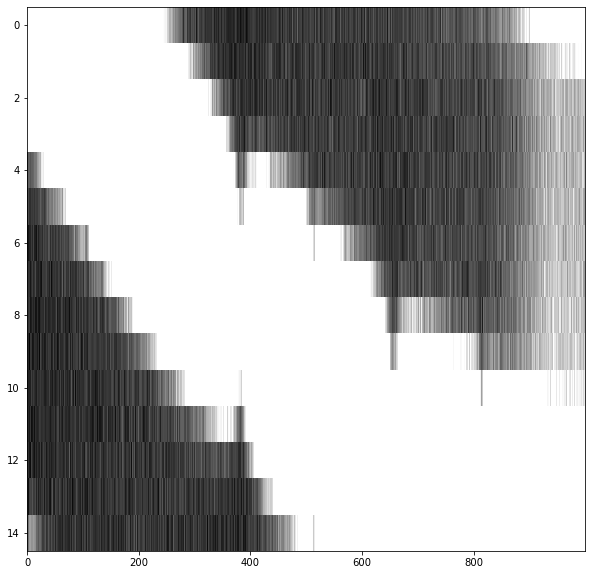

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(image_flip[1333:1348,1200:2200], cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2)

Text(0.5, 1.0, 'Na-D lines')

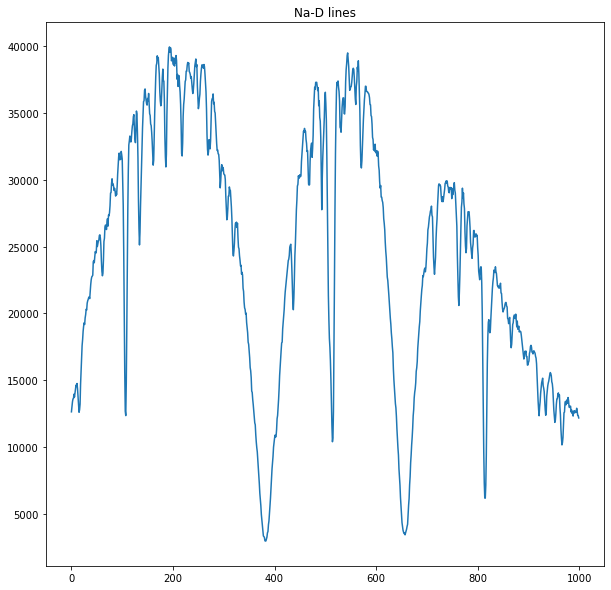

In [49]:
Na_D_patch = image_flip[1333:1348, 1200:2200]
Na_D_patch_1D = np.sum(Na_D_patch, axis = 0) - bias*15
plt.figure(figsize=(10,10))
plt.plot(Na_D_patch_1D)
plt.title('Na-D lines')

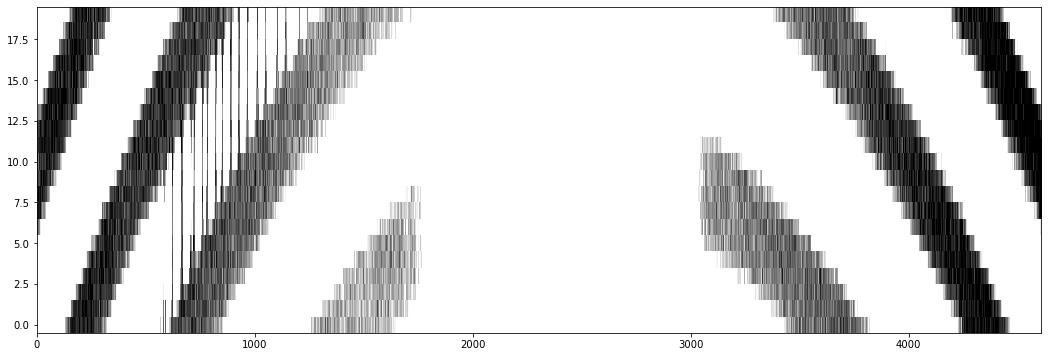

In [50]:
plt.imshow(image_flip[1650:1670], aspect = 'auto', origin = 'lower', cmap = "gray", 
           interpolation = 'nearest', vmin = np.median(image_flip), vmax = np.median(image_flip) *1.1)

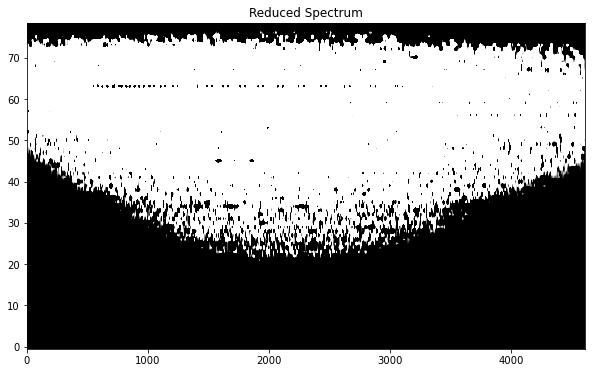

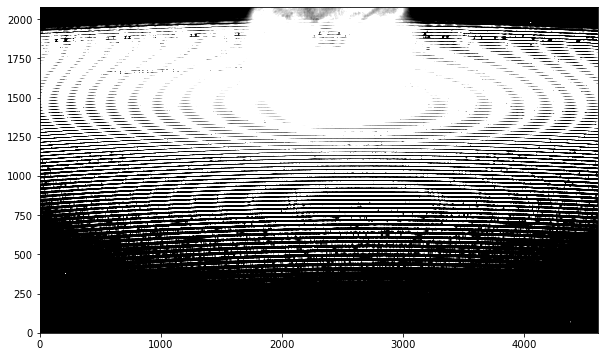

In [51]:
#Load the reduced .fits file and extracting the data
apf_reduced = fits.open('raso.211.fits')
reduced_image_fits = apf_reduced[0].data
#Plot an image of the reduced data
plt.figure(figsize=(10,6))
plt.imshow(reduced_image_fits, cmap = "gray", origin = "lower", aspect = "auto", 
           vmin = np.median(reduced_image_fits), vmax = np.median(reduced_image_fits) *1.1)
plt.title("Reduced Spectrum")
#Plot an image of the raw data
plt.figure(figsize=(10,6))
plt.imshow(image_flip, cmap = "gray", origin = "lower", aspect = "auto", 
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.1)

In [52]:
print("Right Ascension: " + header['RA'])
print("Declination: " + header['DEC'])
print("Target Object: " + header['TOBJECT'])
header_reduced = apf_reduced[0].header
print("Reduced - Right Ascension: " + header_reduced['RA'])
print("Reduced - Declination: " + header_reduced['DEC'])
print("Reduced - Target Object: " + header_reduced['TOBJECT'])

Right Ascension:  0:39:19.8
Declination:  30:51:38.0
Target Object: HIP3092
Reduced - Right Ascension:  0:39:19.8
Reduced - Declination:  30:51:38.0
Reduced - Target Object: HIP3092
